# Comparing Linear, Lasso & Ridge
## 

## Import libraries and load Diabetes Dataset

In [1]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Import Diabetes dataset from sklearn library
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()

## Check the keys of Diabetes Dataset

In [2]:
# Check the indexes of the dataset
diabetes_data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

## Check some data of Diabetes Dataset

In [3]:
# Print data to understand
diabetes_data.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

## Features of the Diabetes Dataset

In [4]:
# Print the features of the dataset
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## Dataset with all features

In [5]:
# Create a dataframe

diabetes = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)

diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## Updated Dataset with target column

In [6]:
# Add target to the dataframe
diabetes['target'] = diabetes_data.target

diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Check for the Null values in data

In [7]:
# check if there are any null values in the data
diabetes.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

## Distplot of target column

C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

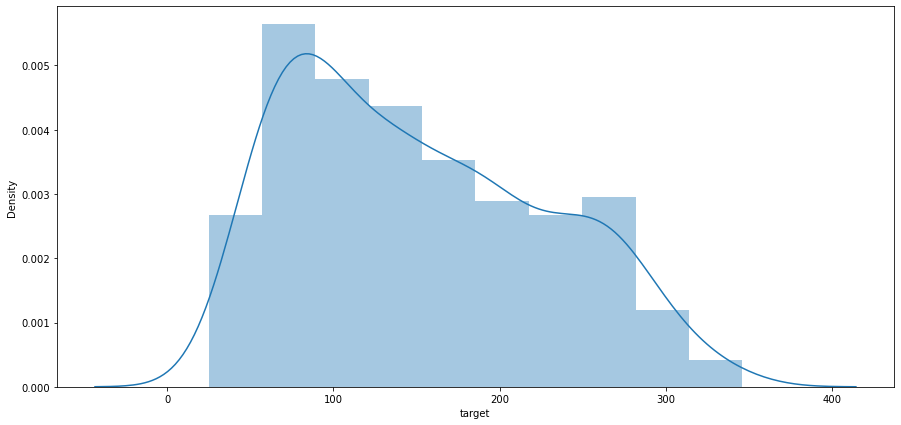

In [8]:
# plot the target column
plt.figure(figsize=(15,7))
sns.distplot(diabetes['target'])

## Check for the Correlation between all the columns.
### Find the most affected columns to target column

<AxesSubplot:>

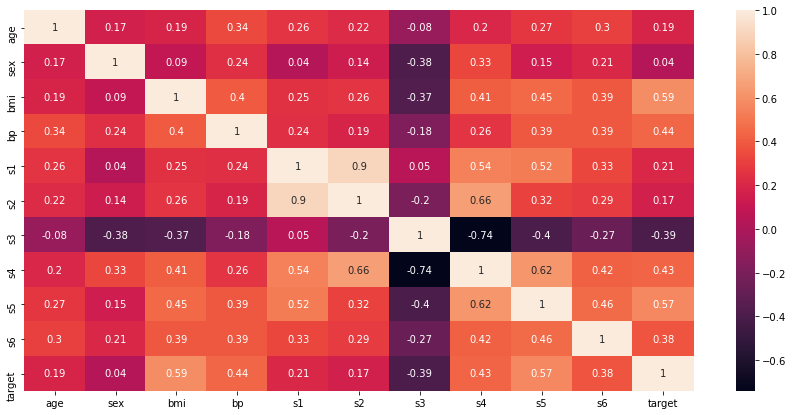

In [9]:
# check for the correlation

plt.figure(figsize=(15,7))
correlation_matrix = diabetes.corr().round(2)
#correlation_matrix
sns.heatmap(data=correlation_matrix, annot=True)

## Show scatterplot of all columns with target

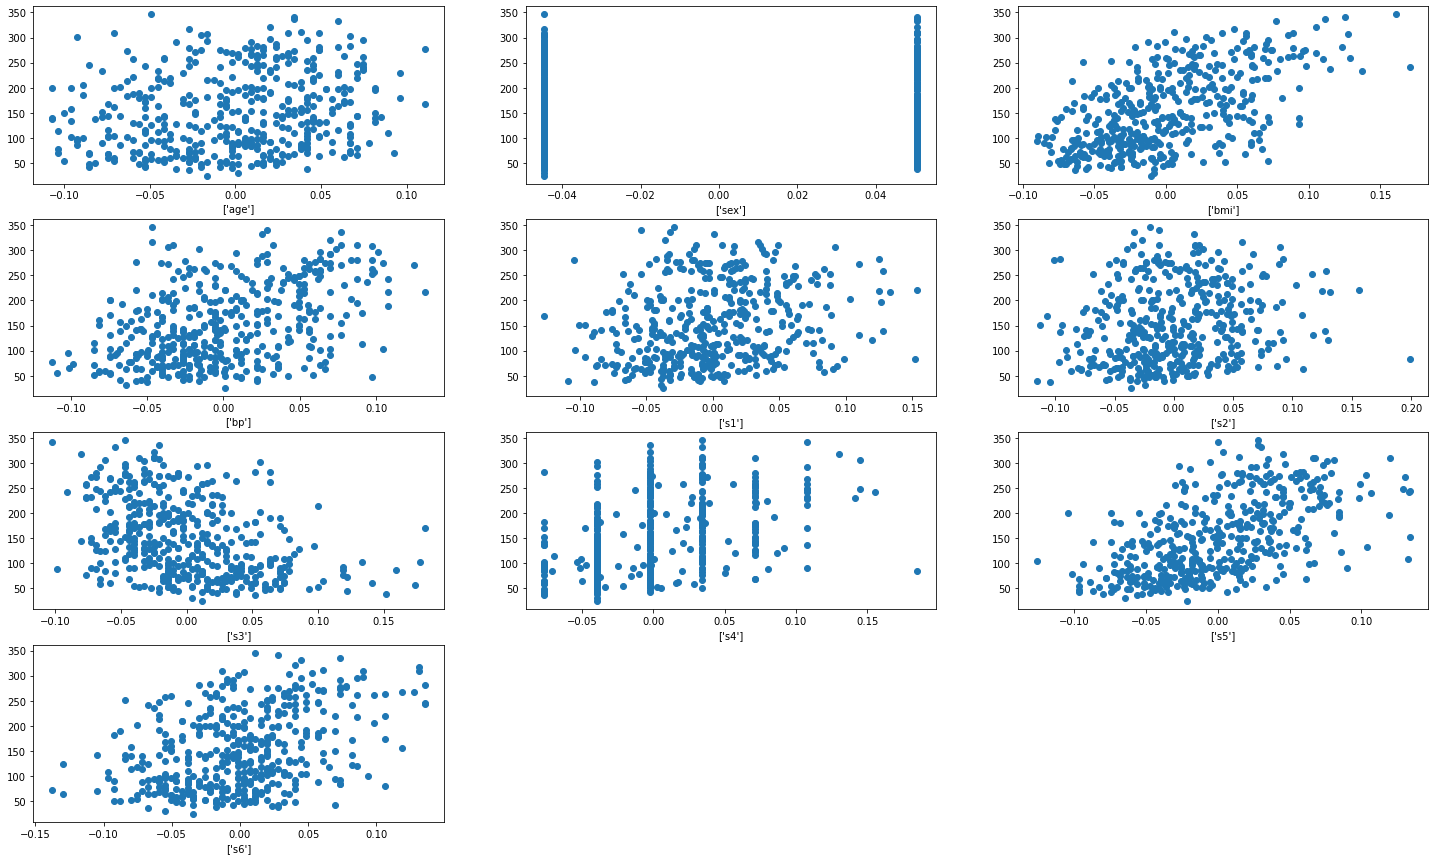

In [10]:
# Plot scatterplot of all the columns to target column

col = diabetes_data.feature_names

count=1
plt.subplots(figsize=(25, 15))
y = diabetes['target']

for i in range(0,10):
    x = diabetes[col[i]]
    plt.subplot(4,3,count)
    plt.scatter(x,y)
    plt.xlabel([col[i]])
    count+=1


## Create a new dataset with all the feature columns. 

In [11]:
X = diabetes.drop(columns=['target'])

Y = diabetes['target']

X
#print(Y)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


## Split the whole dataset into train and test datasets.

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


## Import Linear Regression, Lasso & Ridge.
## Train all the models with data

In [13]:
# import all the libraries
# using Linear, Lasso & Ridge regression

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_model = linear_regressor.fit(X_train,Y_train)

from sklearn.linear_model import Lasso
lasso_regressor = Lasso()
lasso_model = lasso_regressor.fit(X_train,Y_train)

from sklearn.linear_model import Ridge
ridge_regressor = Ridge()
ridge_model = ridge_regressor.fit(X_train,Y_train)

## Predicted data of all the algorithms.
### Compare predicated data with real data

In [14]:
# Print all the predicted data and compare it with the real data

linear_y_train_predict = linear_model.predict(X_train)
lasso_y_train_predict = lasso_model.predict(X_train)
ridge_y_train_predict = ridge_model.predict(X_train)

print("Linear :",linear_y_train_predict[0:5])
print("Lasso  :",lasso_y_train_predict[0:5])
print("Ridge  :",ridge_y_train_predict[0:5])

print("\nReal Data: \n\t",list(Y_train[0:5]))
print("\nAccuracy of Linear model :",round(100*linear_model.score(X_train,Y_train)),"%")
print("Accuracy of Lasso model  :",round(100*lasso_model.score(X_train,Y_train)),"%")
print("Accuracy of Ridge model  :",round(100*ridge_model.score(X_train,Y_train)),"%")

Linear : [108.62837938  91.41040636 256.12868046 116.99516542 146.07154544]
Lasso  : [127.99300517 132.11802757 208.2375182  138.19071596 148.50609529]
Ridge  : [127.92685756 117.94161014 215.87598135 135.17189545 140.80694505]

Real Data: 
	 [135.0, 54.0, 308.0, 53.0, 88.0]

Accuracy of Linear model : 52 %
Accuracy of Lasso model  : 36 %
Accuracy of Ridge model  : 44 %


## Import different Evaluation Metrics

In [15]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
# Mean Square Error
from sklearn.metrics import mean_squared_error
# R2_SCORE
from sklearn.metrics import r2_score

## Check Errors with MAE, MSE, RMSE for "Linear Regression"

In [16]:
# For linear model

# Training Dataset
linear_mae = mean_absolute_error(Y_train,linear_y_train_predict)
linear_mse = mean_squared_error(Y_train,linear_y_train_predict)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(Y_train,linear_y_train_predict)

print("********** Linear Algorithm ***********")
print("\nFor Training Dataset:")
print("\tMAE: ",linear_mae)
print("\tMSE: ",linear_mse)
print("\tRMSE:",linear_rmse)
print("\tR2_score:",linear_r2)


# Test Dataset
linear_y_test_predict = linear_model.predict(X_test)

p_linear_mae = mean_absolute_error(Y_test,linear_y_test_predict)
p_linear_mse = mean_squared_error(Y_test,linear_y_test_predict)
p_linear_rmse = np.sqrt(p_linear_mse)
p_linear_r2 = r2_score(Y_test,linear_y_test_predict)

print("\nFor Test Dataset:")
print("\tMAE: ",p_linear_mae)
print("\tMSE: ",p_linear_mse)
print("\tRMSE:",p_linear_rmse)
print("\tR2_score:",p_linear_r2)

********** Linear Algorithm ***********

For Training Dataset:
	MAE:  42.26334925434265
	MSE:  2766.3155708039803
	RMSE: 52.59577521820531
	R2_score: 0.5198299145989533

For Test Dataset:
	MAE:  48.798721357099524
	MSE:  3373.776698800834
	RMSE: 58.084220738517566
	R2_score: 0.48873328465487675


## Check Errors with MAE, MSE, RMSE for "Lasso"

In [17]:
# For Lasso Model

# Training Dataset
lasso_mae = mean_absolute_error(Y_train,lasso_y_train_predict)
lasso_mse = mean_squared_error(Y_train,lasso_y_train_predict)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(Y_train,lasso_y_train_predict)

print("********** Lasso Algorithm ***********")
print("\nFor Training Dataset: ")
print("\tMAE: ",lasso_mae)
print("\tMSE: ",lasso_mse)
print("\tRMSE:",lasso_rmse)
print("\tR2_score:",lasso_r2)


# Test Dataset
lasso_y_test_predict = lasso_model.predict(X_test)

p_lasso_mae = mean_absolute_error(Y_test,lasso_y_test_predict)
p_lasso_mse = mean_squared_error(Y_test,lasso_y_test_predict)
p_lasso_rmse = np.sqrt(p_lasso_mse)
p_lasso_r2 = r2_score(Y_test,lasso_y_test_predict)

print("\nFor Test Dataset: ")
print("\tMAE: ",p_lasso_mae)
print("\tMSE: ",p_lasso_mse)
print("\tRMSE:",p_lasso_rmse)
print("\tR2_score:",p_lasso_r2,":")

********** Lasso Algorithm ***********

For Training Dataset: 
	MAE:  51.02636604227331
	MSE:  3678.404644193995
	RMSE: 60.649852796144486
	R2_score: 0.3615117917913807

For Test Dataset: 
	MAE:  59.397653166922616
	MSE:  4434.092667059126
	RMSE: 66.58898307572451
	R2_score: 0.32805155888681237 :


## Check Errors with MAE, MSE, RMSE for "Ridge"

In [18]:
# For Ridge model

# Training Dataset
ridge_mae = mean_absolute_error(Y_train,ridge_y_train_predict)
ridge_mse = mean_squared_error(Y_train,ridge_y_train_predict)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(Y_train,ridge_y_train_predict)

print("********** Ridge Algorithm ***********")
print("\nFor Training Dataset:")
print("\tMAE: ",ridge_mae)
print("\tMSE: ",ridge_mse)
print("\tRMSE:",ridge_rmse)
print("\tR2_score:",ridge_r2)


# Test Dataset
ridge_y_test_predict = ridge_model.predict(X_test)

p_ridge_mae = mean_absolute_error(Y_test,ridge_y_test_predict)
p_ridge_mse = mean_squared_error(Y_test,ridge_y_test_predict)
p_ridge_rmse = np.sqrt(p_ridge_mse)
p_ridge_r2 = r2_score(Y_test,ridge_y_test_predict)

print("\nFor Test Dataset:")
print("\tMAE: ",p_ridge_mae)
print("\tMSE: ",p_ridge_mse)
print("\tRMSE:",p_ridge_rmse)
print("\tR2_score",p_ridge_r2)

********** Ridge Algorithm ***********

For Training Dataset:
	MAE:  47.16516895201855
	MSE:  3230.2228967631618
	RMSE: 56.835049896724485
	R2_score: 0.4393060500496706

For Test Dataset:
	MAE:  55.46797509215871
	MSE:  3940.794598321051
	RMSE: 62.775748488736085
	R2_score 0.4028066199966518


## Comparison between Linear, Lasso & Ridge with MAE, MSE, RMSE, R2_score
## Training Set

In [19]:
display_training = pd.DataFrame([[linear_mae,linear_mse,linear_rmse,linear_r2],[lasso_mae,lasso_mse,lasso_rmse,lasso_r2],[ridge_mae,ridge_mse,ridge_rmse,ridge_r2]],index=['Linear','Lasso','Ridge'],columns=['MAE','MSE','RMSE','R2_SCORE'] )

print("Training Dataset:")

display_training


Training Dataset:


,MAE,MSE,RMSE,R2_SCORE
Linear,42.263349,2766.315571,52.595775,0.519830
Lasso,51.026366,3678.404644,60.649853,0.361512
Ridge,47.165169,3230.222897,56.835050,0.439306


**As we can see in the above dataset. Linear Regression MAE is having least value in all three models.**

## Comparison between Linear, Lasso & Ridge with MAE, MSE, RMSE, R2_score
## Test Set

In [20]:
display_test = pd.DataFrame([[p_linear_mae,p_linear_mse,p_linear_rmse,p_linear_r2],[p_lasso_mae,p_lasso_mse,p_lasso_rmse,p_lasso_r2],[p_ridge_mae,p_ridge_mse,p_ridge_rmse,p_ridge_r2]],index=['Linear','Lasso','Ridge'],columns=['MAE','MSE','RMSE','R2_SCORE'] )

print("Test Dataset:")

display_test

Test Dataset:


,MAE,MSE,RMSE,R2_SCORE
Linear,48.798721,3373.776699,58.084221,0.488733
Lasso,59.397653,4434.092667,66.588983,0.328052
Ridge,55.467975,3940.794598,62.775748,0.402807


**As we can see in the above dataset. Linear Regression MAE is having least value in all three regression models.**

# Conclusion:

### Thus we can say that, Linear Regression algorithm has less error than Lasso and Ridge algorithms.
### So, Linear Regression Algorithm is more suitable model to predict the Diabetes progression.